# Módulos Python

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# Extração - Carregar Base

## Arquivo Google Drive

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

In [18]:
# data = pd.read_csv('/content/drive/MyDrive/Steel_industry_data.csv')
data = pd.read_csv('Steel_industry_data.csv')

# Tratamento

## Converter dados para formato numérico

In [19]:
data['Usage_kWh'] = pd.to_numeric(data['Usage_kWh'])
data['Lagging_Current_Reactive.Power_kVarh'] = pd.to_numeric(data['Lagging_Current_Reactive.Power_kVarh'])
data['Leading_Current_Reactive_Power_kVarh'] = pd.to_numeric(data['Leading_Current_Reactive_Power_kVarh'])
data['CO2(tCO2)'] = pd.to_numeric(data['CO2(tCO2)'])
data['Lagging_Current_Power_Factor'] = pd.to_numeric(data['Lagging_Current_Power_Factor'])
data['Leading_Current_Power_Factor'] = pd.to_numeric(data['Leading_Current_Power_Factor'])
data['NSM'] = pd.to_numeric(data['NSM'])

## Usar datetime (tempo) com index dos dados do dataset

In [20]:
data = data.set_index("date")
data.index = pd.to_datetime(data.index)

## Converter Dados Categóricos em dados Numerais

In [21]:
data['WeekStatus'].replace(['Weekday', 'Weekend'], [0, 1], inplace=True)
data['Day_of_week'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0,1,2,3,4,5,6], inplace=True)
data['Load_Type'].replace(['Light_Load', 'Medium_Load', 'Maximum_Load'], [0,1,2], inplace=True)

## Apagar dados faltantes

In [22]:
data = data.dropna()

# Data Visualization

## Correlação apenas do uso de Energia

In [23]:
correlation_mat = data.corr()
correlation_Usage = correlation_mat['Usage_kWh'].sort_values(ascending=False)[1:]
correlation_Usage

CO2(tCO2)                               0.99
Lagging_Current_Reactive.Power_kVarh    0.90
Load_Type                               0.61
Lagging_Current_Power_Factor            0.39
Leading_Current_Power_Factor            0.35
NSM                                     0.23
Day_of_week                            -0.24
WeekStatus                             -0.30
Leading_Current_Reactive_Power_kVarh   -0.32
Name: Usage_kWh, dtype: float64

<AxesSubplot: >

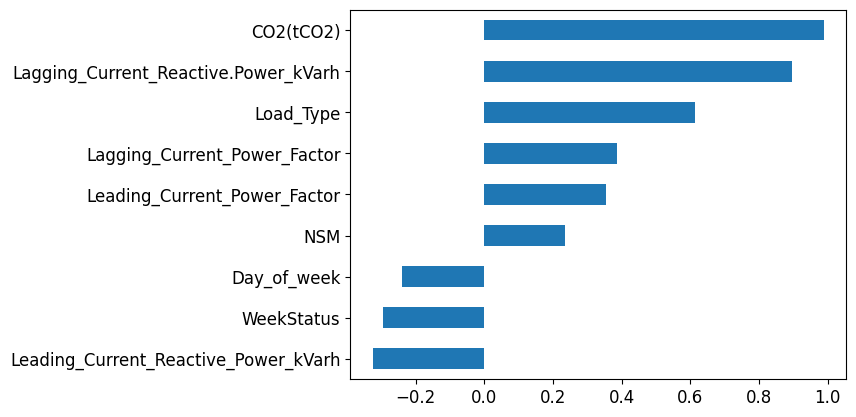

In [24]:
correlation_Usage[::-1].plot(kind='barh', fontsize='12')

## Visulização do Consumo de Energia em Relação aos Outros Dados

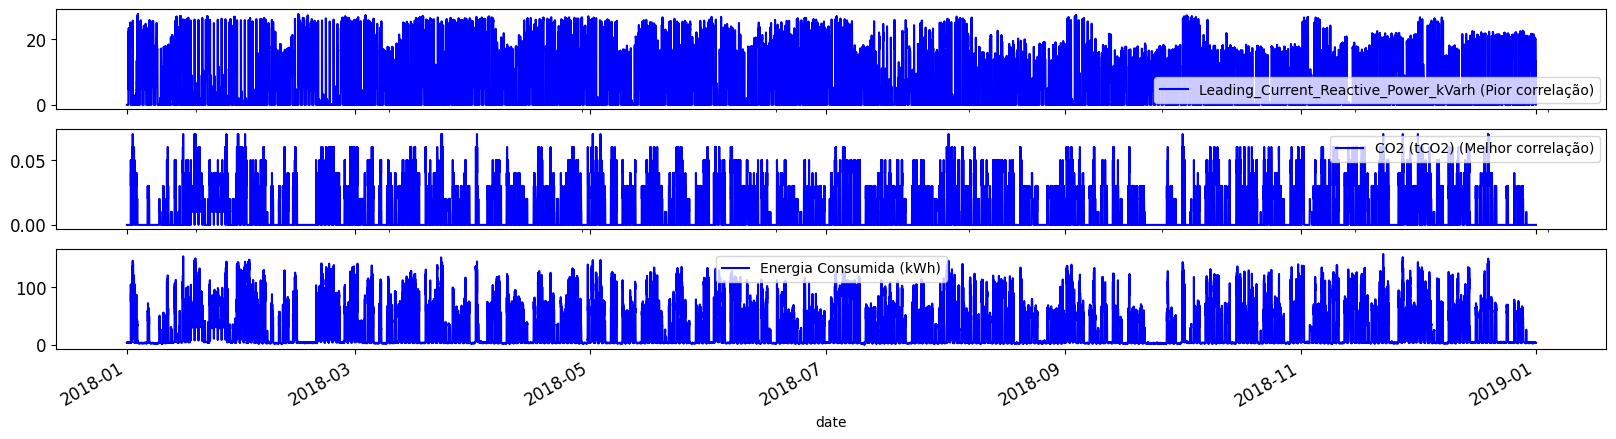

In [25]:
hor_size = 20
ver_size = 5
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(hor_size, ver_size))
data['Leading_Current_Reactive_Power_kVarh'].plot(ax = axes[0], style = '-', color = 'blue', fontsize='12', sharex=True)
data['CO2(tCO2)'].plot(ax = axes[1], style = '-', color = 'blue', fontsize='12', sharex=True)
data['Usage_kWh'].plot(ax = axes[2], style = '-', color = 'blue', fontsize='12', sharex=True)
# plt.xlim(pd.to_datetime("2018-01"),pd.to_datetime("2018-07-15"))
axes[0].legend(['Leading_Current_Reactive_Power_kVarh (Pior correlação)'])
axes[1].legend(['CO2 (tCO2) (Melhor correlação)'])
axes[2].legend(['Energia Consumida (kWh)'])

## Boxplot

<AxesSubplot: xlabel='Usage_kWh'>

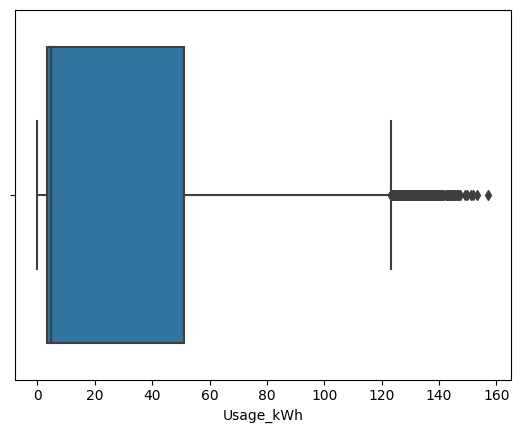

In [26]:
sns.boxplot(x=data['Usage_kWh'])

# Dividir conjuntos para treinamento e testes

## Seleciona os 3 campos com melhor correlação

In [27]:
melhores_correlacoes = correlation_Usage.index.values[:3]
melhores_correlacoes

array(['CO2(tCO2)', 'Lagging_Current_Reactive.Power_kVarh', 'Load_Type'],
      dtype=object)

In [28]:
X = data[melhores_correlacoes]
y = data['Usage_kWh']
X = X.values
y = y.values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10, shuffle = False)

## Visualiza dados de Treino e Teste

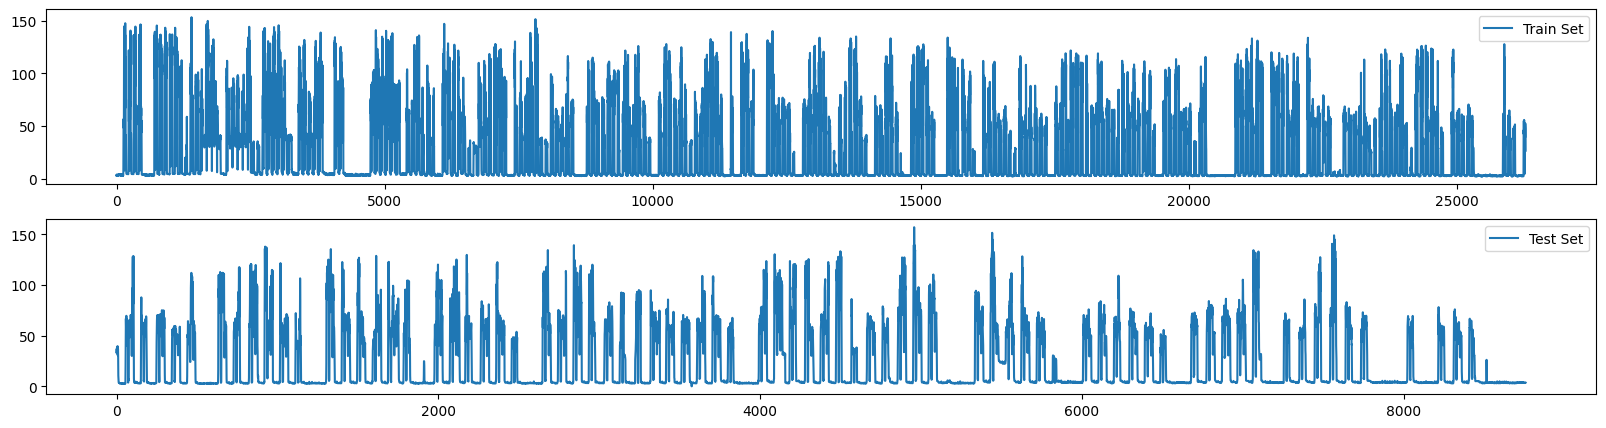

In [29]:
hor_size = 20
ver_size = 5
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(hor_size, ver_size))
axes[0].plot(y_train)
axes[1].plot(y_test)
axes[0].legend(['Train Set'])
axes[1].legend(['Test Set'])

# Implementação dos Modelos de Aprendizado

### Lazy Regressor

In [ ]:
lazyReg = LazyRegressor(ignore_warnings=False)
lazyModels, lazyPredictions = lazyReg.fit(x_train, x_test, y_train, y_test)

In [37]:
lazyModels

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.99,0.99,3.44,0.79
MLPRegressor,0.99,0.99,3.58,13.47
LGBMRegressor,0.99,0.99,3.60,0.13
NuSVR,0.99,0.99,3.60,35.33
HistGradientBoostingRegressor,0.99,0.99,3.61,0.49
SVR,0.99,0.99,3.61,39.23
HuberRegressor,0.99,0.99,3.68,0.08
LassoCV,0.99,0.99,3.69,0.20
LarsCV,0.99,0.99,3.69,0.05


### Modelo Selecionado

In [58]:
# from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

# modelo = MLPRegressor(verbose=True, max_iter=500).fit(x_train, y_train)
modelo = GradientBoostingRegressor(verbose=True).fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         934.9556            0.79s
         2         761.7440            0.73s
         3         621.4211            0.71s
         4         507.7590            0.70s
         5         415.4424            0.65s
         6         340.6644            0.68s
         7         279.9191            0.66s
         8         230.8441            0.63s
         9         190.7520            0.61s
        10         158.4037            0.60s
        20          34.8484            0.50s
        30          17.7560            0.41s
        40          15.0443            0.36s
        50          14.5638            0.31s
        60          14.4108            0.25s
        70          14.3426            0.18s
        80          14.2452            0.12s
        90          14.1850            0.06s
       100          14.1121            0.00s


### Predições e Métricas

In [60]:
from math import sqrt

resultados = pd.DataFrame()
resultado = {}
resultado['Modelo'] = type(modelo).__name__

# previsões dos dados de treino
y_train_pred = modelo.predict(x_train)
resultado['R2_Train'] = r2_score(y_train, y_train_pred)
resultado['RMSE_Train'] = sqrt(mean_squared_error(y_train, y_train_pred))

# previsões dos dados de teste
y_test_pred = modelo.predict(x_test)
resultado['R2_Test'] = r2_score(y_test, y_test_pred)
resultado['RMSE_Test'] = sqrt(mean_squared_error(y_test, y_test_pred))

resultados = pd.concat([resultados, pd.DataFrame([resultado])])
resultados

,Modelo,R2_Train,RMSE_Train,R2_Test,RMSE_Test
0,GradientBoostingRegressor,0.99,3.76,0.99,3.44


# Avaliação dos Resultados Preditos (PS: Os gráficos estão sem dados temporais no eixo "X")

## Avaliação das Métricas dos Modelos Testados

### Métrica R2 (Quanto maior melhor)

<AxesSubplot: ylabel='Modelo'>

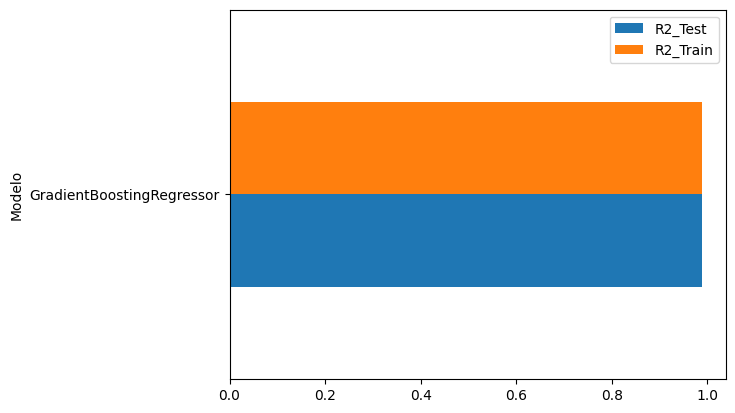

In [61]:
graficoResultados = resultados.sort_values(by='R2_Test', ascending=False).set_index('Modelo')
graficoResultados[['R2_Test', 'R2_Train']].plot(kind='barh')

### Métrica MSE

<AxesSubplot: ylabel='Modelo'>

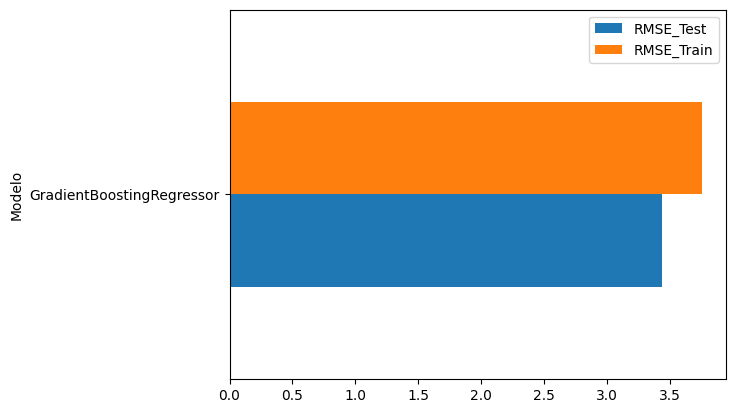

In [62]:
graficoResultados = resultados.sort_values(by='RMSE_Test').set_index('Modelo')
graficoResultados[['RMSE_Test', 'RMSE_Train']].plot(kind='barh')

## Gráfico dos Resultados do Melhor Modelo

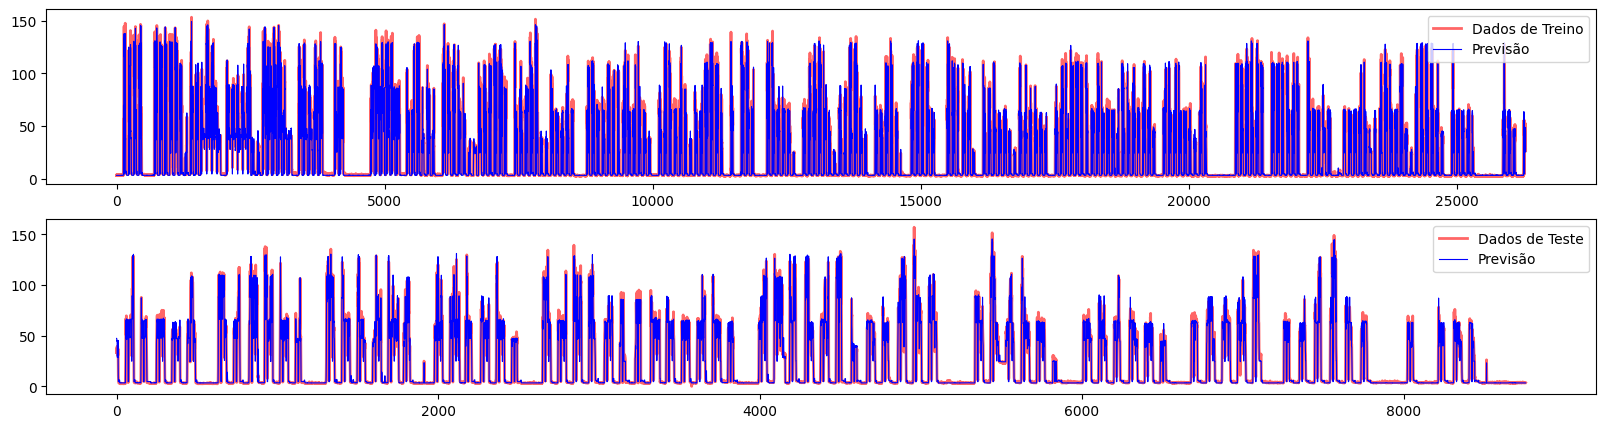

In [63]:
y_train_pred = modelo.predict(x_train)
y_test_pred = modelo.predict(x_test)

hor_size = 20
ver_size = 5
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(hor_size, ver_size))
axes[0].plot(y_train, color = 'red', linewidth=2.0, alpha = 0.6)
axes[0].plot(y_train_pred, color = 'blue', linewidth=0.8)
axes[1].plot(y_test, color = 'red', linewidth=2.0, alpha = 0.6)
axes[1].plot(y_test_pred, color = 'blue', linewidth=0.8)

axes[0].legend(['Dados de Treino', 'Previsão'])
axes[1].legend(['Dados de Teste', 'Previsão'])